##### Mathjax custom macros #####

$ \newcommand{\opexpect}[3]{\langle #1 \vert #2 \vert #3 \rangle} $

$ \newcommand{\rarrow}{\rightarrow} $
$ \newcommand{\bra}{\langle} $
$ \newcommand{\ket}{\rangle} $

$ \newcommand{\mb}[1]{\mathbf{#1}} $
$ \newcommand{\mc}[1]{\mathcal{#1}} $
$ \newcommand{\mbb}[1]{\mathbb{#1}} $
$ \newcommand{\mf}[1]{\mathfrak{#1}} $

$ \newcommand{\vect}[1]{\boldsymbol{\mathrm{#1}}} $
$ \newcommand{\expect}[1]{\langle #1\rangle} $

$ \newcommand{\innerp}[2]{\langle #1 \vert #2 \rangle} $
$ \newcommand{\fullbra}[1]{\langle #1 \vert} $
$ \newcommand{\fullket}[1]{\vert #1 \rangle} $
$ \newcommand{\supersc}[1]{$^{\textrm{#1}}$} $
$ \newcommand{\subsc}[1]{$_{\textrm{#1}}$} $
$ \newcommand{\sltwoc}{SL(2,\mathbb{C})} $
$ \newcommand{\sltwoz}{SL(2,\mathbb{Z})} $

$ \newcommand{\utilde}[1]{\underset{\sim}{#1}} $

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Hubbard Model

##### Hamiltonian:

$$ H_{h} = -t \sum_{<i,j>\sigma} c^\dagger_{i\sigma} c_{j\sigma} + U \sum_i n_{i\uparrow}n_{j\downarrow} - \mu \sum_i (n_{i\uparrow} + n_{i\downarrow}) $$

where the first term is the kinetic energy. The sum is over both possible spin at each lattice site $ \sigma \in \{\uparrow,\downarrow\}$. Second term is the potential energy due to repulsion of electrons at a site containing two electrons. The last term is the chemical potential associated with adding particles to the system.

The partition function for a system in a thermal state is given by:

$$ Z = \text{Tr} \left[ e^{-\beta H} \right] = \sum_\alpha \langle \alpha \vert e^{-\beta H} \vert \alpha \rangle  $$

For $ H_{h} $ on a single site, the partition function becomes:

$$ Z_{h} = 1 + e^{\beta(\mu + t)} + e^{\beta(2t + 2\mu - U)} $$

In [2]:
def partition_hubbard(temp = 1., t = 0., U = 1., mu = 0.,kB = 1.):
    ''' Partition function for single site Hubbard model.
        t is the kinetic energy
        U is the potential energy
        mu is the chemical potential
        temp is the temperature
        kB is Boltzmann's constant, set to 1 by default
    '''
#    temp = temp + 10**(-5)
    beta = 1/(temp*kB)
    exp1 = np.exp(beta*(mu+t))
    exp2 = np.exp(2.0*beta*(mu+t-U/2.0))
    return 1 + 2*exp1 + exp2

In [3]:
partition_hubbard(mu=np.arange(0.1,2,0.5))

array([  3.6596708 ,   5.86564036,  10.32844897,  19.93107835])

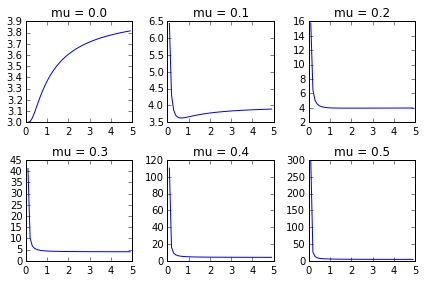

In [4]:
temp_values = np.arange(0.1,5,0.1)
plot_num = 1
for mu in np.arange(0,0.6,0.1):
    z_values = partition_hubbard(temp=temp_values,mu=mu)
    plt.subplot(2,3,plot_num)
    plt.title('mu = '+ str(mu))
    plt.plot(temp_values,z_values)
    plot_num+=1
 
# plt.tight_layout() ensures that neighboring subplots do not overlap
plt.tight_layout()
plt.show()

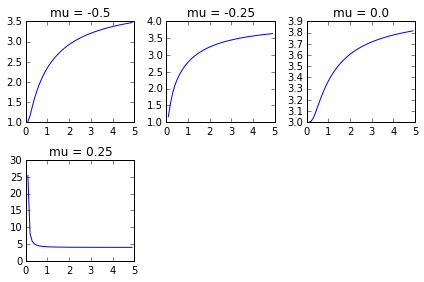

In [5]:
plot_num = 1
for mu in np.arange(-0.5,0.5,0.25):
    z_values = partition_hubbard(temp=temp_values,mu=mu)
    plt.subplot(2,3,plot_num)
    plt.title('mu = '+ str(mu))
    plt.plot(temp_values,z_values)
    plot_num+=1

# plt.tight_layout() ensures that neighboring subplots do not overlap
plt.tight_layout()
plt.show()

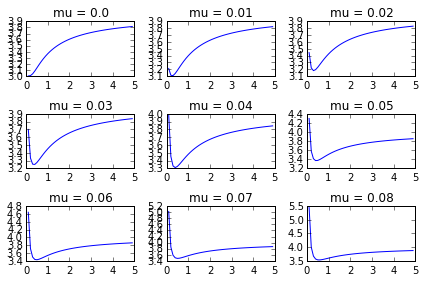

In [6]:
plot_num = 1
for mu in np.arange(0,0.09,0.01):
    z_values = partition_hubbard(temp=temp_values,mu=mu)
    plt.subplot(3,3,plot_num)
    plt.title('mu = '+ str(mu))
    plt.plot(temp_values,z_values)
    plot_num+=1

# plt.tight_layout() ensures that neighboring subplots do not overlap
plt.tight_layout()
plt.show()

The energy for the single site Hubbard model is:

\begin{align}
    E & = \langle H + \mu n \rangle = \text{Tr} \left[ (H + \mu n) e^{-\beta H} \right] \\
      & = \frac{1}{Z} \sum_\alpha \langle \alpha \vert (H + \mu n) e^{-\beta H} \vert \alpha \rangle \\ 
      & = \frac{U e^{2\beta(t+\mu - U/2)}}{1 + e^{\beta(\mu + t)} + e^{\beta(2t + 2\mu - U)}}
\end{align}

and the occupation number is:

\begin{align}
    \rho & = \langle n \rangle = \text{Tr} \left[ n e^{-\beta H} \right] \\
         & = \frac{2 e^{\beta(\mu + t)} + 2 e^{2\beta(t+\mu-U/2)}}{1 + e^{\beta(\mu + t)} + e^{\beta(2t + 2\mu - U)}}
\end{align}

In [7]:
def plot_hubbard(mu):
    z_values = partition_hubbard(temp=temp_values,mu=mu)
    plt.title('mu = '+ str(mu))
    plt.plot(temp_values,z_values)

In [8]:
from IPython.html.widgets import *

:0: FutureWarning: IPython widgets are experimental and may change in the future.


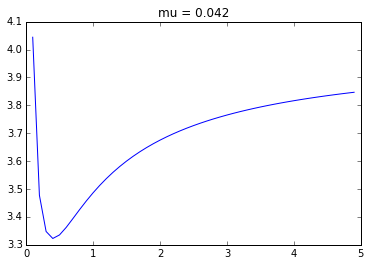

In [9]:
interact(plot_hubbard,mu=(-0.1,0.1,0.001))

In [10]:
def energy_hubbard(temp = 1, t = 0, U = 1, mu = 0,kB = 1):
    ''' Partition function for single site Hubbard model.
        t is the kinetic energy
        U is the potential energy
        mu is the chemical potential
        temp is the temperature
        kB is Boltzmann's constant, set to 1 by default
    '''
#    temp = temp + 10**(-5)
    beta = 1/(temp*kB)
    exp1 = np.exp(beta*(mu+t))
    exp2 = np.exp(2.*beta*(mu+t-U/2.))
    return (-2*t*exp1 + (U - 2*t) * exp2)/(1 + 2*exp1 + exp2 )

In [11]:
def filling_hubbard(temp = 1, t = 0, U = 1, mu = 0,kB = 1):
    ''' Partition function for single site Hubbard model.
        t is the kinetic energy
        U is the potential energy
        mu is the chemical potential
        temp is the temperature
        kB is Boltzmann's constant, set to 1 by default
    '''
#    temp = temp + 10**(-5)
    beta = 1/(temp*kB)
    exp1 = np.exp(beta*(mu+t))
    exp2 = np.exp(2.*beta*(mu+t-U/2.))
    return (2*exp1 + 2*exp2)/(1 + 2*exp1 + exp2 )

In [12]:
mu_values = np.arange(0,10,0.1)

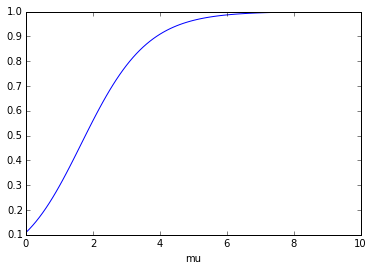

In [13]:
plt.plot(mu_values,energy_hubbard(mu=mu_values))
plt.xlabel('mu')

In [15]:
def plot_filling(temperature):
    f_values = filling_hubbard(temp=temperature,mu=mu_values,t=0,U=4.0)
    plt.title('U = 4.0')
    plt.xlabel(r'$\mu$')
    plt.ylabel(r'$\langle n \rangle $')
    plt.plot(mu_values,f_values,label='T = '+str(temperature))
    plt.legend(loc='lower right', shadow=True)

In [17]:
def plot_energy_mu(temperature):
    e_values = energy_hubbard(temp=temperature,mu=mu_values)
    plt.title('U = 4.0')
    plt.xlabel(r'$\mu$')
    plt.ylabel(r'$\langle E \rangle $')
    plt.legend()
    plt.plot(mu_values,e_values,label='T = '+str(temperature))
    plt.legend(loc='upper center', shadow=True)

/Users/deepak/anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:475: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


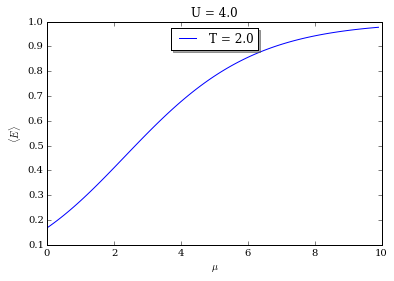

In [18]:
plot_energy_mu(2.0)

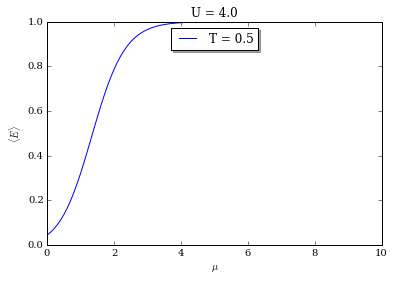

In [19]:
plot_energy_mu(0.5)

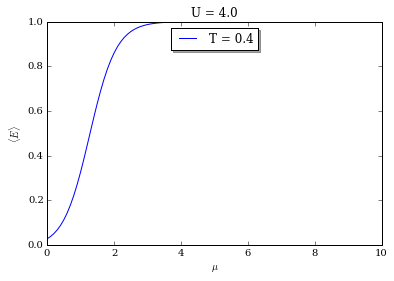

In [20]:
interact(plot_energy_mu,temperature=(0.1,4,0.1))

<function __main__.plot_filling>

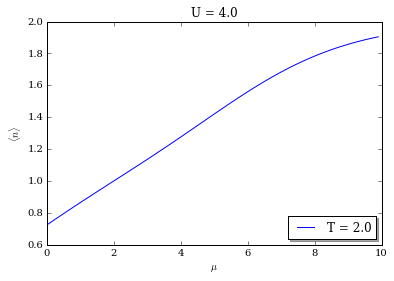

In [21]:
interact(plot_filling,temperature=(0.1,4,0.1))

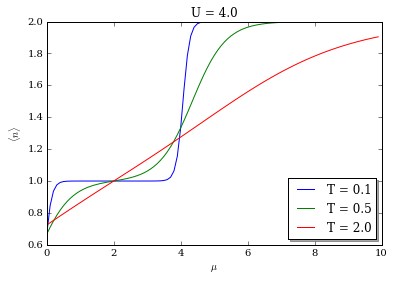

In [22]:
plot_filling(0.1)
plot_filling(0.5)
plot_filling(2.0)

If we redefine the chemical potential $ \mu \rightarrow \mu + U/2$, then the Hubbard hamiltonian becomes:

$$ H = -t \sum_{<i,j>\sigma} c^\dagger_{i\sigma} c_{j\sigma} + U \sum_i \left(n_{i\uparrow} - \frac{1}{2}\right) \left(n_{j\downarrow} - \frac{1}{2}\right) - \mu \sum_i (n_{i\uparrow} + n_{i\downarrow}) $$

In [22]:
from qutip import *

In [23]:
vac = basis(2,0)
vac

Quantum object: dims = [[2], [1]], shape = [2, 1], type = ket
Qobj data =
[[ 1.]
 [ 0.]]

In [24]:
a = create(2)
a.dag()

Quantum object: dims = [[2], [2]], shape = [2, 2], type = oper, isherm = False
Qobj data =
[[ 0.  1.]
 [ 0.  0.]]

In [25]:
a.dag() * vac

Quantum object: dims = [[2], [1]], shape = [2, 1], type = ket
Qobj data =
[[ 0.]
 [ 0.]]

In [26]:
a * vac

Quantum object: dims = [[2], [1]], shape = [2, 1], type = ket
Qobj data =
[[ 0.]
 [ 1.]]

In [27]:
a * a * vac

Quantum object: dims = [[2], [1]], shape = [2, 1], type = ket
Qobj data =
[[ 0.]
 [ 0.]]

In [28]:
a * a.dag() + a.dag() * a

Quantum object: dims = [[2], [2]], shape = [2, 2], type = oper, isherm = True
Qobj data =
[[ 1.  0.]
 [ 0.  1.]]

In [29]:
b = destroy(2)
b * a.dag() + a * b.dag()

Quantum object: dims = [[2], [2]], shape = [2, 2], type = oper, isherm = True
Qobj data =
[[ 0.  0.]
 [ 0.  0.]]

In [30]:
tensor(a,a)

Quantum object: dims = [[2, 2], [2, 2]], shape = [4, 4], type = oper, isherm = False
Qobj data =
[[ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 1.  0.  0.  0.]]

In [31]:
basis(8)

Quantum object: dims = [[8], [1]], shape = [8, 1], type = ket
Qobj data =
[[ 1.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]

In [32]:
basis(4,2)

Quantum object: dims = [[4], [1]], shape = [4, 1], type = ket
Qobj data =
[[ 0.]
 [ 0.]
 [ 1.]
 [ 0.]]

In [33]:
spin = basis(2,0)
vac = basis(2,0)

In [34]:
sigmax() - 0.j*sigmay()

Quantum object: dims = [[2], [2]], shape = [2, 2], type = oper, isherm = True
Qobj data =
[[ 0.  1.]
 [ 1.  0.]]

In [35]:
sigmay()

Quantum object: dims = [[2], [2]], shape = [2, 2], type = oper, isherm = True
Qobj data =
[[ 0.+0.j  0.-1.j]
 [ 0.+1.j  0.+0.j]]

In [36]:
from sympy import Function, Symbol, S, I, oo

In [37]:
Function?

In [38]:
from sympy.physics.quantum import boson, fermion

In [39]:
c = fermion.FermionOp('c')

In [40]:
fermion??

In [41]:
c.name

c